In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
nds = pd.read_csv('Data_set/netflix_titles.csv')
nds

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
Movie = nds.loc[nds['type'] == 'Movie' , 'release_year']
TV_Show = nds.loc[nds['type'] == 'TV Show' , 'release_year']

In [4]:
np.random.choice(Movie , size = len(Movie))


array([2019, 2011, 2017, ..., 2017, 2019, 2016], shape=(6131,))

In [5]:
np.random.choice(TV_Show , size = len(TV_Show))

array([2009, 2019, 2017, ..., 2014, 2019, 2019], shape=(2676,))

In [6]:
def resample(original_data):
    return np.random.choice(original_data, size=len(original_data))

In [7]:
def bootstrap(orginal_data, reps):
    means = np.array([])

    for i in range(reps):
        new_data = resample(orginal_data)
        new_mean = np.mean(new_data)
        means = np.append(means, new_mean)
    return means

In [8]:
Movie_means = bootstrap(Movie, 1000)
TV_Show_means = bootstrap(TV_Show, 1000)
estimates = Movie_means - TV_Show_means
estimates

array([-3.25603369, -3.32854574, -3.48334391, -3.41248047, -3.33688307,
       -3.59460304, -4.03237663, -3.71698667, -3.48335671, -3.44844597,
       -3.08341927, -3.37675207, -3.43617125, -3.43986733, -3.51001935,
       -3.720051  , -3.71208961, -3.55794732, -3.17841612, -3.12198337,
       -3.24518034, -3.61877874, -3.66519695, -3.58312896, -3.32702726,
       -3.69579222, -3.46866228, -3.32475036, -3.3761937 , -3.48707297,
       -3.96639758, -3.51118047, -3.34207295, -3.55466894, -3.56104596,
       -3.5542733 , -3.4834816 , -3.41934895, -3.60979215, -3.6542676 ,
       -3.29706423, -3.53897613, -3.48734463, -3.29398364, -3.71412654,
       -3.5125662 , -3.36577037, -3.44231385, -3.71848766, -3.55954455,
       -3.77893788, -3.32761068, -3.42563491, -3.49432117, -3.68821683,
       -3.53927028, -3.40666762, -3.35137222, -3.33861738, -3.18769643,
       -3.36406544, -3.83288577, -3.4632116 , -3.30094835, -3.70695507,
       -3.4846835 , -3.45787879, -3.34214024, -3.57267083, -3.53

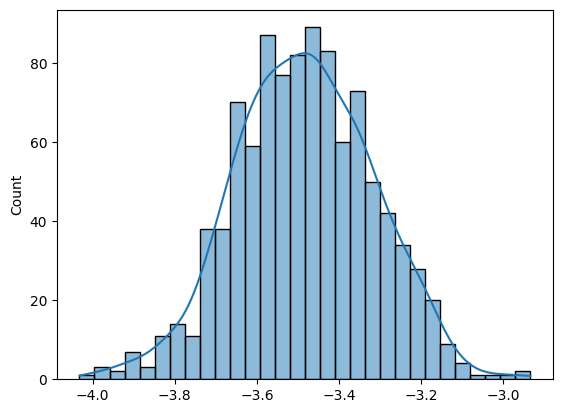

In [9]:
sn.histplot(estimates, bins=30, kde=True)
plt.show()

In [10]:
(np.percentile(estimates, 2.5), np.percentile(estimates, 97.5))

(np.float64(-3.8236818470616583), np.float64(-3.175582270282678))

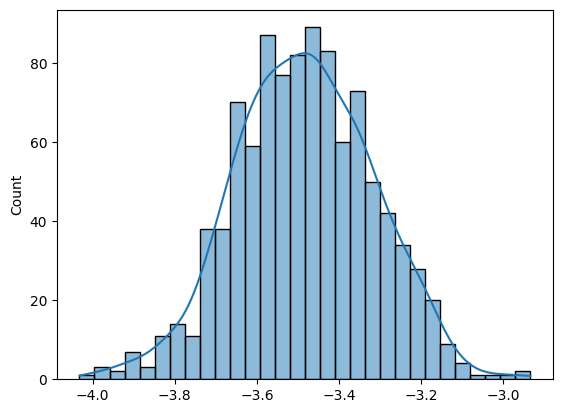

In [11]:
sn.histplot(estimates, bins=30, kde=True)
plt.show()